### Import Datasets

In [ ]:
import numpy as np
from glob import glob
import pandas as pd
import os

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# show image
import cv2

In [ ]:
# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))

dog_files = np.array(glob("/data/dog_images/*/*/*"))
dog_files_train = np.array(glob("/data/dog_images/train/*/*"))
dog_files_valid = np.array(glob("/data/dog_images/valid/*/*"))
dog_files_test = np.array(glob("/data/dog_images/test/*/*"))

In [ ]:
# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))
print('There are %d total dog images for training.' % len(dog_files_train))
print('There are %d total dog images for validation.' % len(dog_files_valid))
print('There are %d total dog images for testing.' % len(dog_files_test))

There are 13233 total human images.
There are 8351 total dog images.
There are 6680 total dog images for training.
There are 835 total dog images for validation.
There are 836 total dog images for testing.


 The proportion of train, test and valid sets is 80%, 10%,and 10%, respectively.

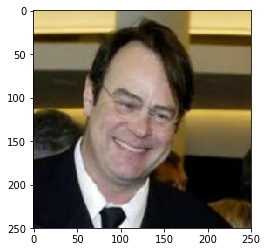

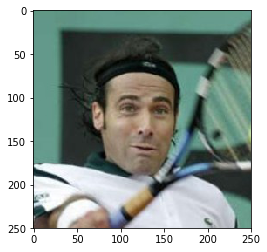

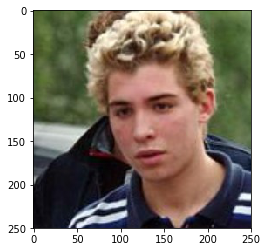

In [ ]:
# Sample images in human folder
for i in range(3):
    img = cv2.imread(human_files[i])
    # convert BGR image to RGB for plotting
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # display the image, along with bounding box
    plt.imshow(cv_rgb)
    plt.show()

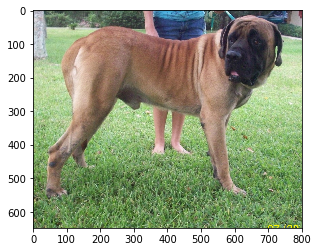

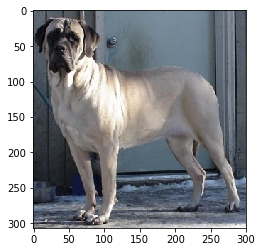

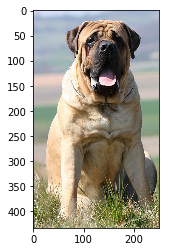

In [ ]:
# Sample images in dog folder
for i in range(3):
    img = cv2.imread(dog_files[i])
    # convert BGR image to RGB for plotting
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # display the image, along with bounding box
    plt.imshow(cv_rgb)
    plt.show()

In [ ]:
# Define a function to count the number of files in folders in a directory
def file_counts(path="."):
    """

    :param path: the path of the directory where the file is to be searched
    :return file_count_dict: a dictionary containing the number of files in each folder
    in a directory
    """
    count_dict = {}

    total_file_count = 0

    for dirpath, dirnames, filenames in os.walk(path):
        file_count, folder_count = len(filenames), len(dirnames)
        total_file_count += file_count
        count_dict[dirpath.split('/')[-1]] = file_count
    return count_dict

### Dog Images

In [ ]:
# count dog images by counting the files within a folder
dog_files_train_dict = file_counts(path="/data/dog_images/train")
dog_files_train_df = pd.DataFrame.from_dict({'dog_breed': list(dog_files_train_dict.keys()), 
                                      'count': list(dog_files_train_dict.values())})
# remove the filename "train"
dog_files_train_df = dog_files_train_df[dog_files_train_df['dog_breed']!='train']

# sort by count in descending order
dog_files_train_df = dog_files_train_df.sort_values(by=['count'], ascending=False)

dog_files_train_df.head()

,dog_breed,count
21,005.Alaskan_malamute,77
34,029.Border_collie,74
130,015.Basset_hound,73
121,057.Dalmatian,71
45,041.Bullmastiff,69


#### Distribution of drug breeds

In [ ]:
dog_files_train_df.describe()

,count
count,133.000000
mean,50.225564
std,11.863885
min,26.000000
25%,42.000000
50%,50.000000
75%,61.000000
max,77.000000


Training set contains 133 distinct dog breeds. On average, there are 50 images in each class. The maximum image count is 77 and minimum count is 26.

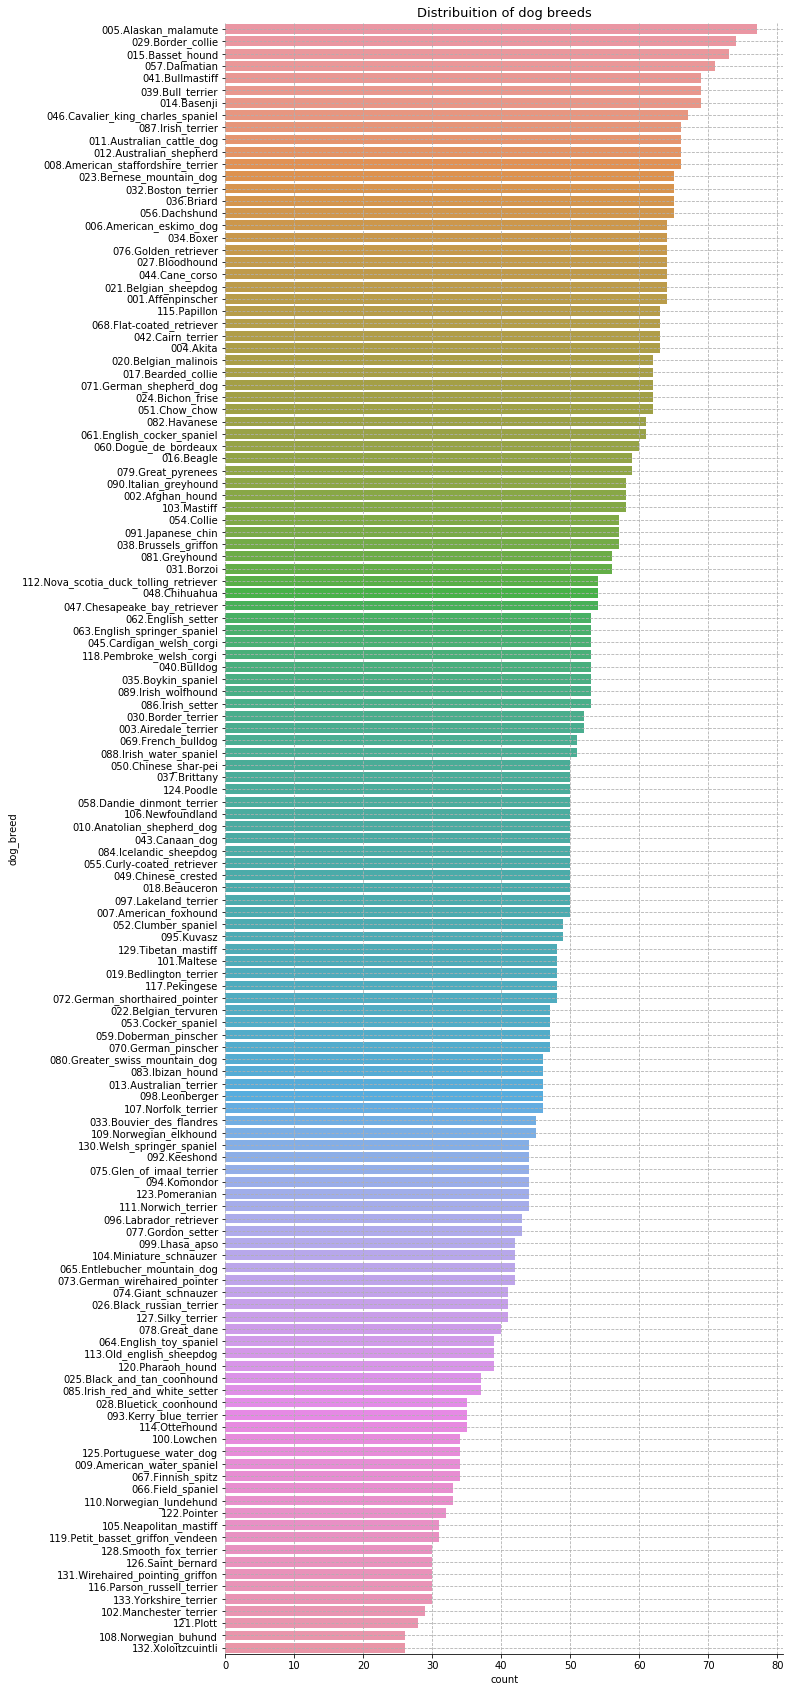

In [ ]:
# Create chart
fig, ax = plt.subplots(figsize=(10,30))
ax = sns.barplot(x="count", y="dog_breed", data=dog_files_train_df)

# Decorate chart
ax.set_title("Distribuition of dog breeds", fontsize=13) 

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

y_axis = ax.axes.get_yaxis()
y_axis.set_visible(True)
ax.grid(linestyle='dashed')

plt.savefig("EDA_figure_1.png", bbox_inches='tight')

The image dataset is imbalanced for different dog breeds.

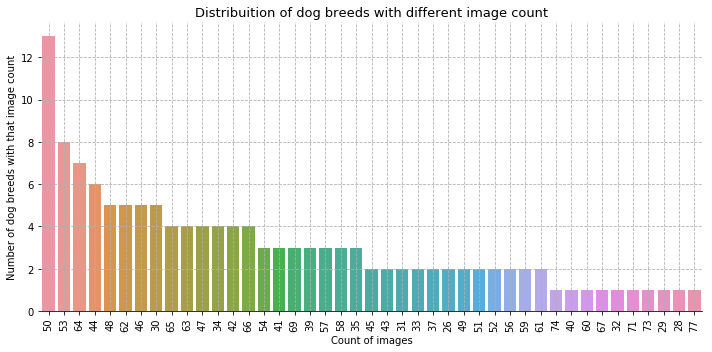

In [ ]:
# Create chart
fig, ax = plt.subplots(figsize=(10, 5))

ax = sns.countplot(x = dog_files_train_df['count'], order = dog_files_train_df['count'].value_counts().index)

# Decorate chart
ax.set_title("Distribuition of dog breeds with different image count", fontsize=13) 
ax.set(xlabel="Count of images", ylabel = "Number of dog breeds with that image count")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

y_axis = ax.axes.get_yaxis()
y_axis.set_visible(True)
ax.grid(linestyle='dashed')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
plt.savefig("EDA_figure_2.png", bbox_inches='tight')

### Human Images

In [ ]:
# count human images by counting the files within a folder
human_files_dict = file_counts(path="/data/lfw")
human_files_df = pd.DataFrame.from_dict({'name': list(human_files_dict.keys()), 
                                      'count': list(human_files_dict.values())})

# remove the filename "lfw"
human_files_df = human_files_df[human_files_df['name']!='lfw']

# sort by count in descending order
human_files_df = human_files_df.sort_values(by=['count'], ascending=False)

human_files_df.head()

,name,count
2636,George_W_Bush,530
946,Colin_Powell,236
1167,Tony_Blair,144
4614,Donald_Rumsfeld,121
3838,Gerhard_Schroeder,109


#### Human name distribution

In [ ]:
human_files_df.describe()

,count
count,5749.000000
mean,2.301792
std,9.016410
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,530.000000


Human set contains 5749 distinct human names. On average, there are 2.3 images in each class. The maximum image count is 530 and minimum count is 1.

In [ ]:
# 530 images are from the same person, George_W_Bush
human_files_df[human_files_df['count']==530]

,name,count
2636,George_W_Bush,530


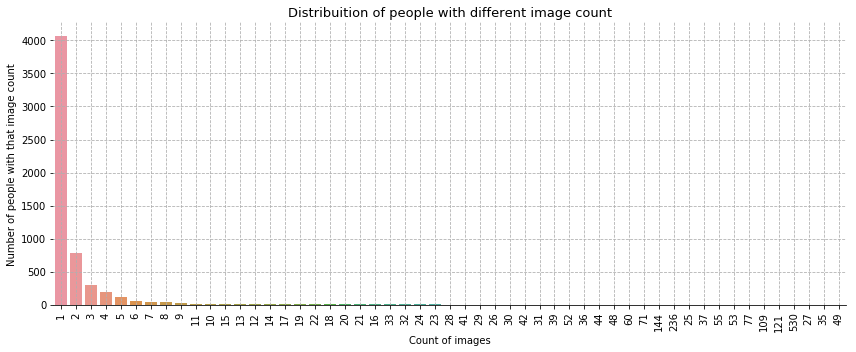

In [ ]:
# Create chart 
fig, ax = plt.subplots(figsize=(12, 5))
plt.xlabel('Number of people')
plt.ylabel('Number of images')
ax = sns.countplot(x = human_files_df['count'], order = human_files_df['count'].value_counts().index)

# Decorate chart
ax.set_title("Distribuition of people with different image count", fontsize=13) 
ax.set(xlabel="Count of images", ylabel = "Number of people with that image count")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

y_axis = ax.axes.get_yaxis()
y_axis.set_visible(True)
ax.grid(linestyle='dashed')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
plt.savefig("EDA_figure_3.png", bbox_inches='tight')

Majority of people have 1 to 9 images. Let's zoom into those people who have more than 9 images.

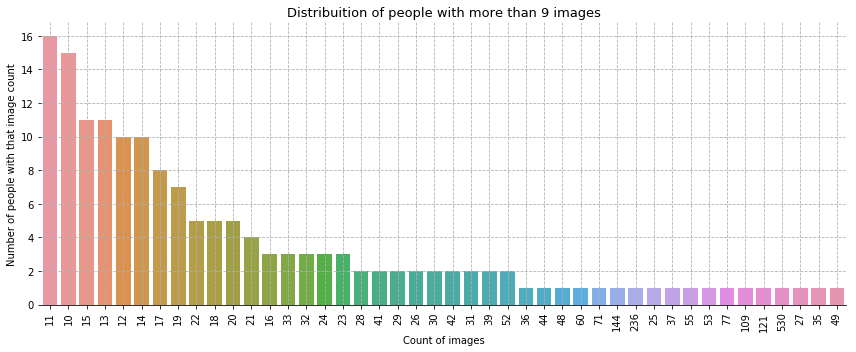

In [ ]:
# Create chart 
fig, ax = plt.subplots(figsize=(12, 5))
ax = sns.countplot(x = human_files_df['count'], order = human_files_df['count'].value_counts().index[9:])

# Decorate chart
ax.set_title("Distribuition of people with more than 9 images", fontsize=13) 
ax.set(xlabel="Count of images", ylabel = "Number of people with that image count")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

y_axis = ax.axes.get_yaxis()
y_axis.set_visible(True)
ax.grid(linestyle='dashed')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
plt.savefig("EDA_figure_4.png", bbox_inches='tight')